In [1]:
import numpy as np # linear algebra
import pandas as pd
import os

In [2]:
data = pd.read_csv('ex1data1.csv')
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


**2. Linear regression with one variable**

predicting the profit given the population of the city | objective is to tell where to put the new branch given the population

**2.1 Plotting the data**

In [3]:
import matplotlib.pyplot as plt
plt.scatter(data['population'],data['profit'])
plt.xlabel('population in 10000s')
plt.ylabel('profit in 10000s $')

Text(0,0.5,'profit in 10000s $')

**2.2 Gradient Descent** 
Fitting the linear regression

In [4]:
# extracting the data
X = np.array(data.iloc[:,0]).reshape(-1,1)
Y = np.array(data.iloc[:,1]).reshape(-1,1)
np.shape(X),np.shape(Y)

((97, 1), (97, 1))

In [5]:
theta = np.zeros((2,1))
ones = np.ones((len(X),1))
X_new = np.concatenate((ones,X),axis=1) # adding bias column to the matrix for 
# cost function
def cost_function(X,theta,Y):
    m = len(X)
    return (1/(2*m))*np.sum(np.square((X@theta-Y)))

# gradient search
def gradient_descent(theta,X,Y,alpha=0.01,iters=1500):
    cost = []
    thetas = []
    for _ in range(iters):
        m,n = np.shape(X)
        theta_new = theta-alpha*1/m*np.transpose(X) @ (X@theta - Y)
        cost.append(cost_function(X,theta_new,Y))
        thetas.append(theta_new)
        theta = theta_new # update the parameters
    return theta_new,cost,thetas

initial_cost = cost_function(X_new,theta,Y)
theta_new,cost,thetas= gradient_descent(theta,X_new,Y)
initial_cost

32.072733877455676

**2.4 Visualizing**


Text(0,0.5,'profit in 10000s $')

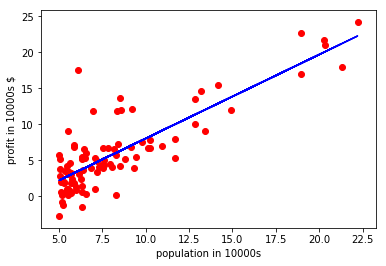

In [6]:
# prediction 
predictions = X_new@theta_new
plt.plot(X,predictions,color='blue')
plt.scatter(X,Y,color='red')
plt.xlabel('population in 10000s')
plt.ylabel('profit in 10000s $')

**2.4.1 Visualizing the error over each iterations**

Text(0,0.5,'Error')

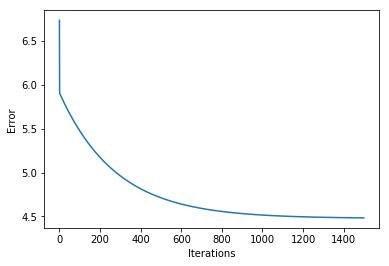

In [7]:
plt.plot(range(1500),cost)
plt.xlabel('Iterations')
plt.ylabel('Error')

**2.4.2 Visualization of the gradient descent for coefficients**

Text(0.5,0,'Error')

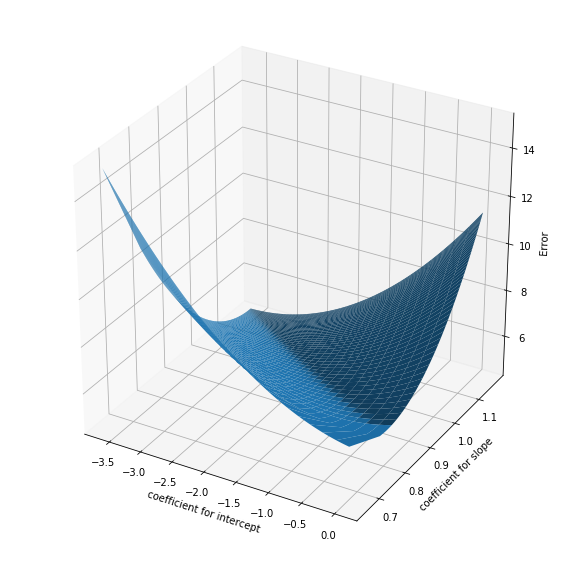

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# unpacking the theta values
b0s,b1s=[],[]
for i in range(len(thetas)):
    b0s.append(thetas[i][0])
    b1s.append(thetas[i][1])
b0s = np.array(b0s)
b1s = np.array(b1s)
X_grid,Y_grid = np.meshgrid(b0s,b1s)

# forming the 2D matrix for cost function 
Z_grid = np.array([cost_function(X_new,np.array([x,y]).reshape(2,1),Y) for x,y in zip(np.ravel(X_grid),np.ravel(Y_grid))])
Z_grid = Z_grid.reshape(X_grid.shape)

# Now plot once the 2D matrix for each axis is prepared
ax.plot_surface(X_grid,Y_grid,Z_grid)
ax.set_xlabel('coefficient for intercept')
ax.set_ylabel('coefficient for slope')
ax.set_zlabel('Error')
# ax.view_init(10, angle)

**References**
1. plotting surface plot - https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib
2. Vectorized implementation - https://medium.com/ml-ai-study-group/vectorized-implementation-of-cost-functions-and-gradient-vectors-linear-regression-and-logistic-31c17bca9181 

**3. Linear regression with multiple regression (optional exercise)**

In [9]:
# import the data
data2 = pd.read_csv('ex1data2.csv')
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**3.1 Feature Scaling**

Here each variable is in different scale, hence feature scaling is required. So that our learning converges quickly.

In [10]:
# Extracting the variables
X1 = np.array(data2.iloc[:,0:2]).reshape(-1,2)
Y1 = np.array(data2.iloc[:,2]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X,sc_Y = StandardScaler(), StandardScaler()
X_norm = sc_X.fit_transform(X1)
Y_norm = sc_Y.fit_transform(Y1)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
# we can now apply the same function to learn the parameter for this model
np.shape(X_norm),np.shape(Y_norm)

((47, 2), (47, 1))

In [12]:
# add ones column to the X matrix for constant term in the model
ones1 = np.ones(shape=(len(X1),1))
X_new1 = np.concatenate((ones1,X_norm),axis=1)
n1,m1 = np.shape(X_new1)
# initiating the intial learning parameters for the model
theta1 = np.zeros(shape=(m1,1))

np.shape(X_new1), np.shape(theta1)

((47, 3), (3, 1))

**3.2 Gradient Descent (learning)**

In [13]:
cost_function(X_new1,theta1,Y_norm)

0.5

In [14]:
theta_new1,cost1,thetas1 = gradient_descent(theta1,X_new1,Y_norm,iters=400,alpha=0.01)

**3.3 Visualization**

Text(0,0.5,'Error')

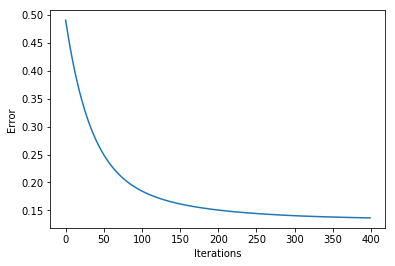

In [15]:
plt.plot(range(400),cost1)
plt.xlabel('Iterations')
plt.ylabel('Error')

**3.4 Selecting Learning rates (optional ungraded exercise) **

Text(0,0.5,'Errors')

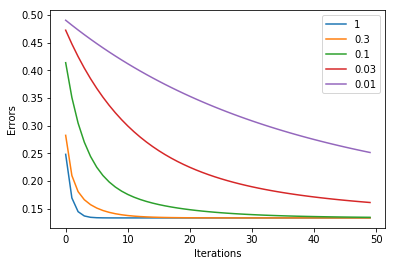

In [16]:
rates = [1,0.3,0.1,0.03,0.01]
start = 0
stop = 50

for rate in rates:
    theta_new2,cost2,thetas2 = gradient_descent(theta1,X_new1,Y_norm,iters=stop,alpha=rate)
    plt.plot(range(start,stop),cost2[start:stop],label=rate)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Errors')

learning rate in the range of 0.3 to 1 converges faster than 0.01 which takes lot of iterations to converge.